# Redes Neuronales - TP1
## Ej 1

Entrene una red de Hopfield ‘82 con las imágenes binarias disponibles en el campus.
1. Verifique si la red aprendió las imágenes enseñadas.
2. Evalúe la evolución de la red al presentarle versiones alteradas de las imágenes aprendidas: agregado de ruido, elementos borrados o agregados.
3. Evalúe la existencia de estados espurios en la red: patrones inversos y combinaciones de un número impar de patrones. (Ver Spurious States, en la sección 2.2, Hertz, Krogh & Palmer, pág. 24).
4. Realice un entrenamiento con las 6 imágenes disponibles. ¿Es capaz la red de aprender todas las imágenes? Explique.

### Inciso 1

Lo primero que voy a hacer es importar las bibliotecas básicas para poder desarrollar el ejercicio. 

In [1]:
# primero importamos numpy y algo para leer imágenes y hacer graficos
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Para las imágenes opté la manera fácil de usarlas locales, pero no sería difícil descargarlas desde gitHub en runtime y usarlas de ahí. Para los incisos 1, 2 y 3 separé las imágenes en 2 grupos porque son de diferentes tamaños. El cuarto se hace con las 6 imágenes con alguna modificación a los tamaños. 

In [2]:
# necesito paths a las imagenes,vienen de un repo clonado localmente 
path1 = 'imagenes_tp1\\paloma.bmp'
path2 = 'imagenes_tp1\\panda.bmp' # 50*50
path3 = 'imagenes_tp1\\perro.bmp' #50*50
path4= 'imagenes_tp1\\quijote.bmp'
path5= 'imagenes_tp1\\torero.bmp'
path6= 'imagenes_tp1\\v.bmp' #50*50


Necesito las imágenes como vectores columna, asi como si fueran realizaciones de píxeles. La altura de estos vectores nos da la cantidad de neuronas que se necesitan para la red y, por ende, el tamaño de la matriz $W$ de pesos de interconexión de neuronas. Como se discutió en clase, la diagonal de $W$ son ceros para que las nueronas no se realimenten a si mismas. 

Para este primer caso, el factor de aprendizaje $\eta$ se mantiene unitario, no afecta al aprendizaje. 

La matriz $W$ se compone de diferentes $w_{i,j}$, inicializados en cero (van de -1 a 1) y actualizados según la regla:
$$
\Delta {w_{i,j}}_{n} = \eta \cdot  p^1 _i \cdot p^1 _j
$$
$$
{w_{i,j} }_{n+1} = {w_{i,j}}_{n} + \Delta {w_{i,j}}_{n}
$$

Dónde $p^1 _i$ es el pattern\patrón en la iteración 1 y posición i. 

La matriz se calcula por medio de un producto matricial entre los vectores columna de datos con ellos mismos. 

In [3]:
# función para leer una imagen y devolver un array numpy
def read_image(path):
    img = Image.open(path).convert('1')  # escala blanco y negro
    vector_img = np.array(img, dtype=np.int8)  # Directamente como float32
    forma = vector_img.shape # la forma original de la imagen
    vector_img = vector_img.ravel()
    vector_img = (vector_img * 2 ) - 1  # (0,1) -> (-1,1)
    vector_img = np.asarray(vector_img).reshape(-1, 1)  # Convertir a columna
    return vector_img,forma

Cargo las imágenes a vectores y luego junto las de mismo tamaño.

In [4]:
img1,forma1 = read_image(path1)
img2,forma2 = read_image(path2)
img3,forma3 = read_image(path3)
img4,forma4 = read_image(path4)
img5,forma5 = read_image(path5)
img6,forma6 = read_image(path6)

dataset1 = np.hstack((img2,img3,img6))
dataset2 = np.hstack((img1,img4,img5))

# las guardo así para que sean vectores, sino es incomodo pasarlas como slices de los datasets. 
paloma_img = dataset2[:,0]
panda_img = dataset1[:,0]
perro_img = dataset1[:,1]
quijote_img = dataset2[:,1]
torero_img = dataset2[:,2]
v_img = dataset1[:,2]

Con los datasets calculamos las matrices de pesos.

In [5]:
def calcular_W(patrones,eta=1):
    n_neuronas = patrones.shape[0]
    n_patrones = patrones.shape[1]
    X = patrones
    W = (X @ X.T - n_patrones*np.eye(n_neuronas))* eta

    return W

In [6]:
W1 = calcular_W(dataset1)
W2 = calcular_W(dataset2)

Ahora quiero una función que avance 1 paso de la red neuronal. 

In [7]:
def step_red_neuronal(W,patron_inicial):
    """
        Patrón inicial debe ser vector columna.
    """
    estado = np.copy(patron_inicial)
    estado = W @ estado
    estado = np.sign(estado)
    estado = np.where(estado == 0, 1, estado)  # Manejar ceros
    return estado

Con esta función simple podemos verificar si las redes implícitas en las matrices W aprendieron las imágenes. Avanzo 1 paso por cada imágen usada para entrenar y verifico si el nuevo estado coincide con el anterior. Si es así, ese estado es uno de los que aprendió. 

In [8]:
step_img2 = step_red_neuronal(W1,panda_img) # acá aprovecho que el dataset ya las tiene en forma de columna
step_img3 = step_red_neuronal(W1,perro_img)
step_img6 = step_red_neuronal(W1,v_img)

step_img1 = step_red_neuronal(W2,paloma_img)
step_img4 = step_red_neuronal(W2,quijote_img)
step_img5 = step_red_neuronal(W2,torero_img)


In [9]:
def chequear_memoria(txt,W,imagen):
    b = imagen
    a = step_red_neuronal(W,imagen)
    if np.array_equal(a, b):
        print(txt,"son iguales\n")
    else:
        print(txt,"no son iguales\n")
    
    return a

_ = chequear_memoria("panda:",W1,panda_img)
_ = chequear_memoria("perro:",W1,perro_img)
_ = chequear_memoria("v:",W1,v_img)
_ = chequear_memoria("paloma:",W2,paloma_img)
_ = chequear_memoria("quijote:",W2,quijote_img)
_ = chequear_memoria("torero:",W2,torero_img)


panda: son iguales

perro: son iguales

v: son iguales

paloma: son iguales

quijote: son iguales

torero: son iguales



Por lo que se observa, las imágenes son estados de los cuales las redes neuronales correspondientes no se mueven, por lo que fueron aprendidos. Ahora mostramos las imágenes del antes y después. 

In [10]:
def mostrar_par_antes_desp_img(img_antes,img_desp,forma,txt1="Antes",txt2="Después"):
    img_antes = (img_antes + 1) / 2  # (-1,1) -> (0,1)
    img_desp = (img_desp + 1) / 2  # (-1,1) -> (0,1)
    img_antes = img_antes.reshape(forma)
    img_desp = img_desp.reshape(forma)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img_antes, cmap='gray')
    axs[0].set_title(txt1)
    axs[1].imshow(img_desp, cmap='gray')
    axs[1].set_title(txt2)
    plt.show()

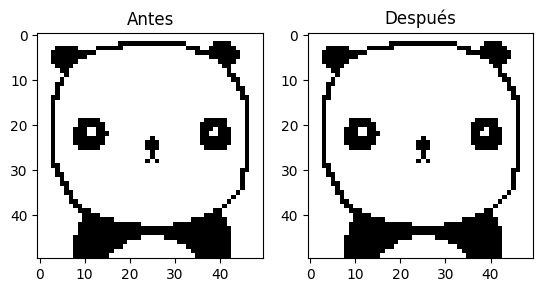

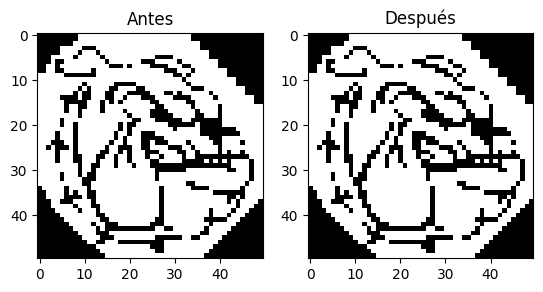

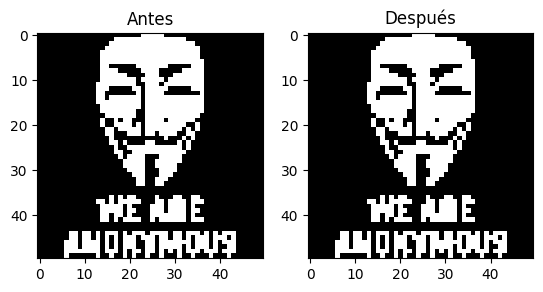

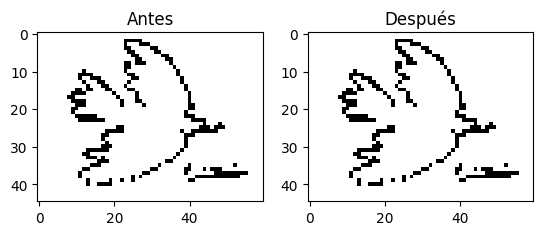

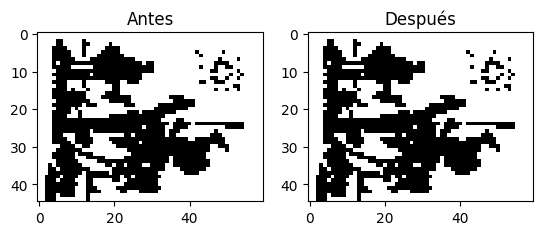

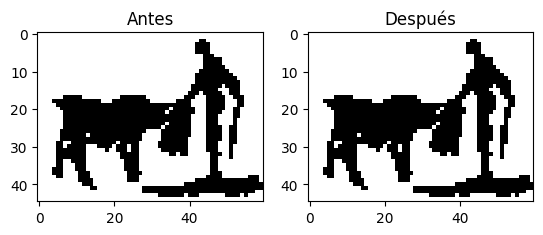

In [11]:
mostrar_par_antes_desp_img(panda_img,step_img2,forma2)
mostrar_par_antes_desp_img(perro_img,step_img3,forma3)
mostrar_par_antes_desp_img(v_img,step_img6,forma6)
mostrar_par_antes_desp_img(paloma_img,step_img1,forma1)
mostrar_par_antes_desp_img(quijote_img,step_img4,forma4)
mostrar_par_antes_desp_img(torero_img,step_img5,forma5)

### Inciso 2

Ahora voy a cargar unas fotos editadas a mano, con elemenos quitados y agregados. La idea es ver si la red converge a la imagen original partiendo de la editada, lo que indicaría que fueron aprendidas. Ahora incluyo las imágenes nuevas y las muestro junto con las originales. 

In [12]:
# necesito paths a las imagenes,vienen de un repo clonado localmente 
path1_e = 'imagenes_editadas_tp1\\paloma.bmp'
path2_e = 'imagenes_editadas_tp1\\panda.bmp' # 50*50
path3_e = 'imagenes_editadas_tp1\\perro.bmp' #50*50
path4_e= 'imagenes_editadas_tp1\\quijote.bmp'
path5_e = 'imagenes_editadas_tp1\\torero.bmp'
path6_e = 'imagenes_editadas_tp1\\v.bmp' #50*50

img1_e,forma1_e = read_image(path1_e)
img2_e,forma2_e = read_image(path2_e)
img3_e,forma3_e = read_image(path3_e)
img4_e,forma4_e = read_image(path4_e)
img5_e,forma5_e = read_image(path5_e)
img6_e,forma6_e = read_image(path6_e)

dataset1_e = np.hstack((img2_e,img3_e,img6_e)) # datasets de imgs editadas
dataset2_e = np.hstack((img1_e,img4_e,img5_e))

# las editadas
paloma_img_e = dataset2_e[:,0]
panda_img_e = dataset1_e[:,0]
perro_img_e = dataset1_e[:,1]
quijote_img_e = dataset2_e[:,1]
torero_img_e = dataset2_e[:,2]
v_img_e = dataset1_e[:,2]

# aunque es medio repetitivo sirve para el 3


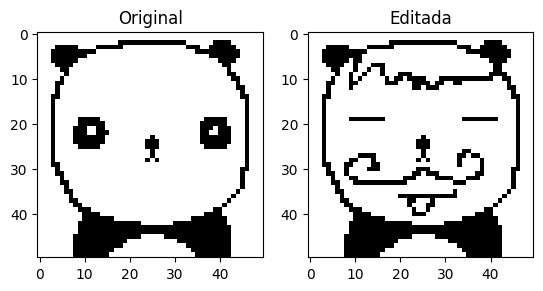

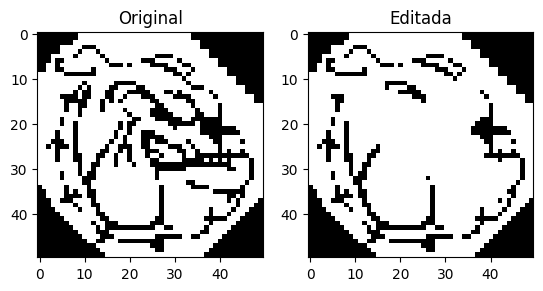

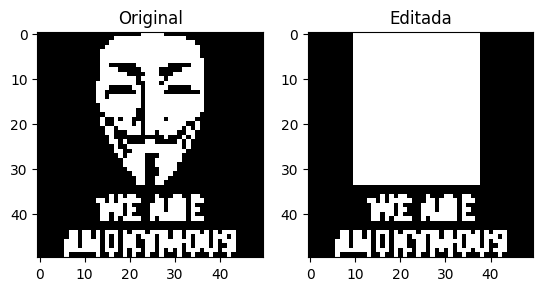

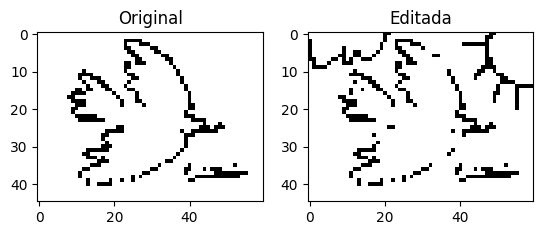

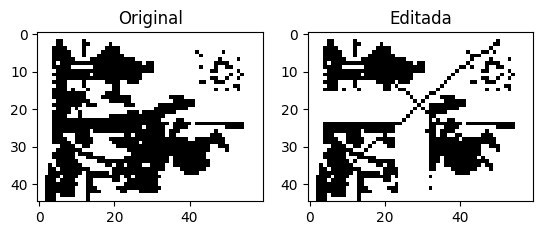

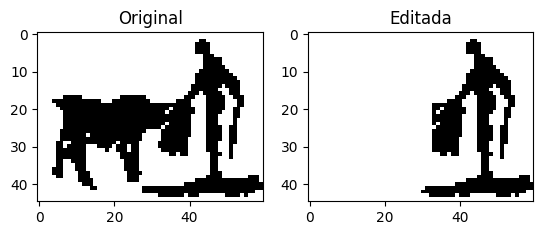

In [13]:
mostrar_par_antes_desp_img(panda_img,panda_img_e,forma2,"Original","Editada")
mostrar_par_antes_desp_img(perro_img,perro_img_e,forma3,"Original","Editada")
mostrar_par_antes_desp_img(v_img,v_img_e,forma6,"Original","Editada")


mostrar_par_antes_desp_img(paloma_img,paloma_img_e,forma1,"Original","Editada")
mostrar_par_antes_desp_img(quijote_img,quijote_img_e,forma4,"Original","Editada")
mostrar_par_antes_desp_img(torero_img,torero_img_e,forma5,"Original","Editada")

Como se expresó antes, lo ideal sería observar que la red sea capaz de volver a los estados que memorizó. Lo que se va a hacer es iterar y ver a que converge la red. Como a priori no sé cuantas veces hay que iterar para llegar a un mínimo, hago ua función que corta por convergencia (si no cambia entre iteraciones) o por un máximo de iteraciones. 

In [14]:
def iter_hasta_convergencia(W, patron_inicial, max_iters=100):
    """
    Toma una matriz W y un patrón inicial. Avanza la red neuronal de a un paso hasta que converge o se excede max_iters. 
    Devuelve la lista de todos los estados que atravesó la red neuronal. 
    """
    estados = []
    estado_actual = np.copy(patron_inicial)
    estados.append(estado_actual)
    
    for i in range(max_iters):
        estado_nuevo = step_red_neuronal(W, estado_actual)
        estados.append(estado_nuevo)
        
        # Verificar convergencia segun estado actual y anterior
        if np.array_equal(estado_nuevo, estado_actual):
            print(f"Convergencia alcanzada en {i+1} iteraciones")
            break
            
        estado_actual = estado_nuevo
    
    return estados

In [15]:
def plot_evolucion_compacta(estados, forma_original,estado_memorizado,txt ="memorizado"):
    """
    Muestra la evolución como una secuencia de miniaturas. 
    """
    n_iteraciones = len(estados)
    
    # Calcular grid size
    n_cols = min(5, n_iteraciones)  # Máximo 5 columnas
    n_rows = (n_iteraciones + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2.5*n_rows))
    
    # Aplanar el array de axes correctamente
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])  # Caso especial: 1x1
    elif n_rows == 1 or n_cols == 1:
        axes = axes.ravel()  # Caso: 1 fila o 1 columna
    else:
        axes = axes.ravel()  # Caso: múltiples filas y columnas
    
    for i, estado in enumerate(estados):
        if i < len(axes):
            # Reconstruir imagen
            img = estado.reshape(forma_original)
            axes[i].imshow(img, cmap='gray', vmin=-1, vmax=1)
            axes[i].set_title(f'Iter {i}')
            axes[i].axis('off')
    
    # Ocultar ejes vacíos
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    if np.array_equal(estado_memorizado,estados[-1]):
        print("El último estado es igual al ",txt)
    else:
        print("El último estado NO es igual al ",txt)
    
    plt.tight_layout()
    plt.show()


Convergencia alcanzada en 2 iteraciones
El último estado NO es igual al  memorizado


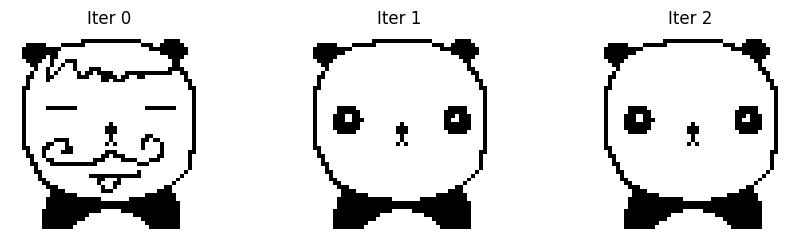

In [16]:
estados = iter_hasta_convergencia(W1, panda_img_e) # primer imagen del 2do dataset
plot_evolucion_compacta(estados, forma2_e,panda_img_e)

Convergencia alcanzada en 2 iteraciones
El último estado es igual al  memorizado


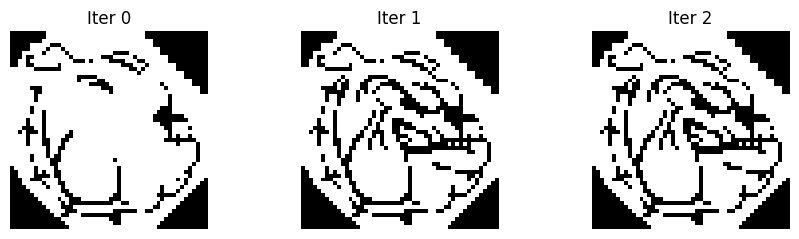

In [17]:
estados = iter_hasta_convergencia(W1, perro_img_e) 
plot_evolucion_compacta(estados, forma3_e, perro_img)

Convergencia alcanzada en 2 iteraciones
El último estado es igual al  memorizado


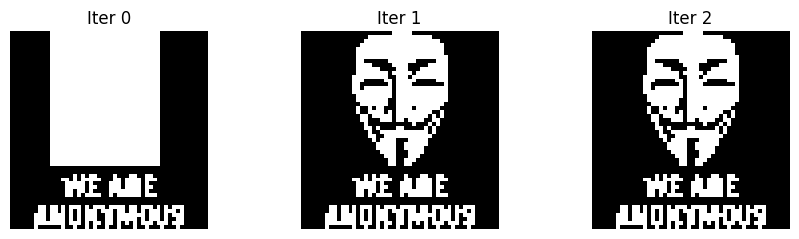

In [18]:
estados = iter_hasta_convergencia(W1, v_img_e)
plot_evolucion_compacta(estados, forma6_e, v_img)

Convergencia alcanzada en 2 iteraciones
El último estado es igual al  memorizado


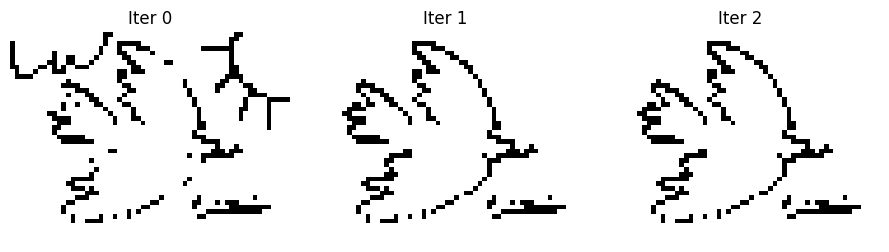

In [19]:
estados = iter_hasta_convergencia(W2, paloma_img_e) 
plot_evolucion_compacta(estados, forma4_e, paloma_img)

Convergencia alcanzada en 2 iteraciones
El último estado es igual al  memorizado


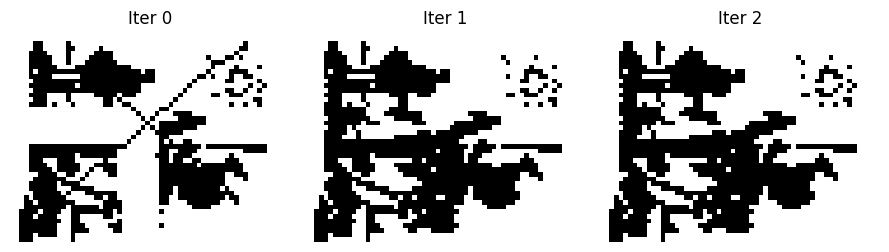

In [20]:
estados = iter_hasta_convergencia(W2, quijote_img_e)
plot_evolucion_compacta(estados, forma4_e, quijote_img)

Convergencia alcanzada en 2 iteraciones
El último estado es igual al  memorizado


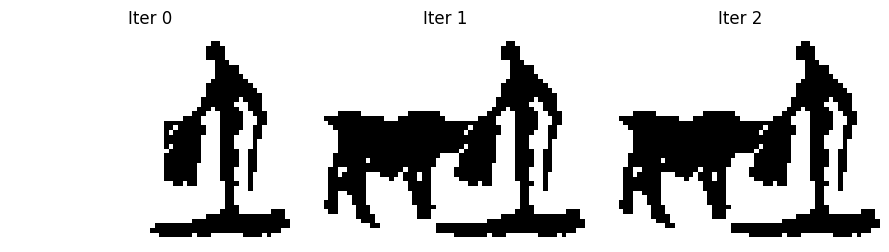

In [21]:
estados = iter_hasta_convergencia(W2, torero_img_e)
plot_evolucion_compacta(estados, forma5_e,torero_img)

Arriba se puede ver la secuencia de estados atravezados por las 2 redes neuronales. Todas convergieron en 2 iteraciones, y son 2 porque se requiere de una 2da para verificar la convergencia. Es más, El último estado de cada red coincide con la imagen no editada, que ya se había verificado que habían sido memorizadas. 

### Inciso 3

Ahora hay que probar los estados espurios. La bibliografía indicada en las consignas habla del concepto de estados atractores, que en nuestro caso son las imágenes aprendidas. Sin embargo, por cada uno de estos estados atractores, existe el estado inverso (-1 es 1, 1 es -1), que también es atractor y tienen la misma energía que el patrón original (por lo que también es un mínimo). Luego, hay patrones que son una combinación lineal de un número impar de patrones que también funcionan como atractores, y la cantidad sale de hacer todas las permutaciones posibles con todos los estados memorizados. Por último, hay patrones que aparecen de forma más espuria. 


En este inciso voy a intentar mostrar la existencia de algunos de los estados espurios, probando con las inversas de algunas imágenes, alguna combinación lineal e iniciar en un patrón visualmente "lejano" a los memorizados.  

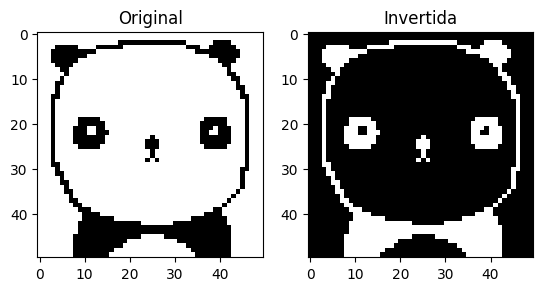

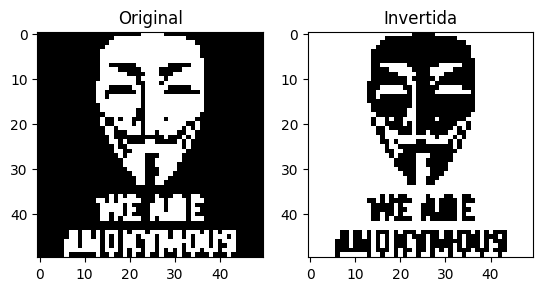

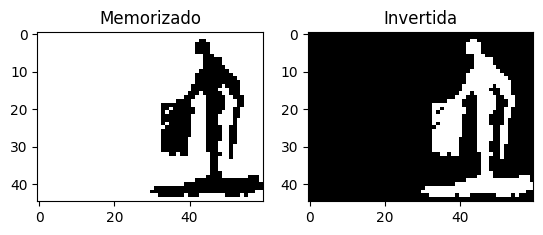

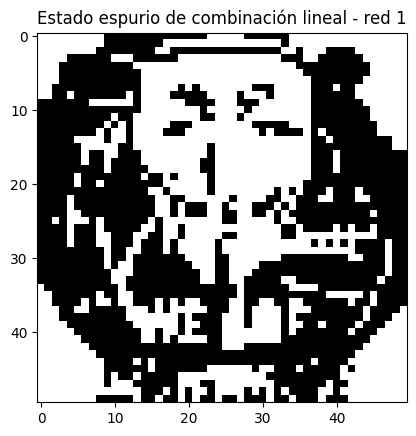

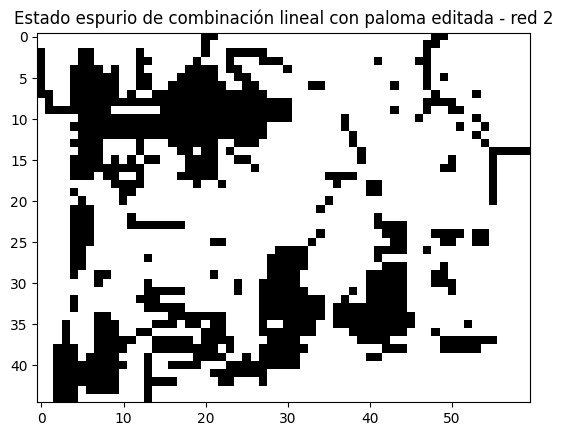

In [22]:
panda_inv = -np.copy(panda_img) # aprovecho que son -1 y 1, el copy evita que se referencien y cambie todo
v_inv = -np.copy(v_img)
torero_inv_e = -np.copy(torero_img_e)

estado_comb_lin1 = np.sign(panda_img - perro_img +v_img)
estado_comb_lin2_e = np.sign(paloma_img_e + quijote_img - torero_img) # le meto una editada adentro
estado_comb_lin2 = np.sign(paloma_img + quijote_img - torero_img) # el original de la editada, al que debería converger

torero_inv = -np.copy(torero_img)

mostrar_par_antes_desp_img(panda_img,panda_inv,forma2,"Original","Invertida")
mostrar_par_antes_desp_img(v_img,v_inv,forma6,"Original","Invertida")
mostrar_par_antes_desp_img(torero_img_e,torero_inv_e,forma5,"Memorizado","Invertida")

def plot_1_img(img, forma,titulo):
    img = np.copy((img + 1) / 2 ) # (-1,1) -> (0,1)
    img = img.reshape(forma)
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(titulo)
    plt.show()

plot_1_img(estado_comb_lin1, forma2,"Estado espurio de combinación lineal - red 1")
plot_1_img(estado_comb_lin2_e, forma1,"Estado espurio de combinación lineal con paloma editada - red 2")


Convergencia alcanzada en 1 iteraciones
El último estado es igual al  original


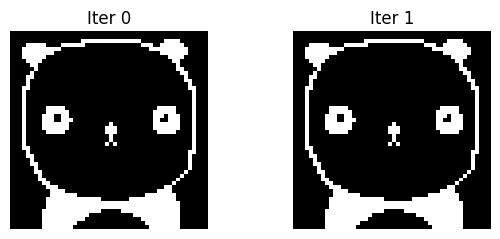

In [23]:
estados = iter_hasta_convergencia(W1, panda_inv) 
plot_evolucion_compacta(estados, forma2_e,panda_inv,"original")

Arriba se ve que la imágen del panda invertido es un mínimo porque la red no cambia de estado al iterar. 

Convergencia alcanzada en 1 iteraciones
El último estado es igual al  original


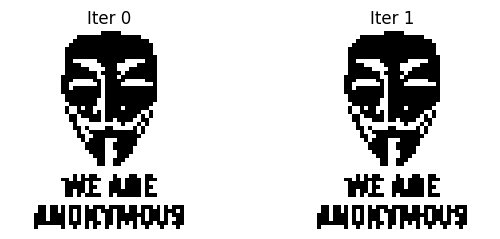

In [24]:
estados = iter_hasta_convergencia(W1, v_inv)
plot_evolucion_compacta(estados, forma6_e, v_inv,"original")

Acá pasa lo mismo que con el panda, la imágen de "v" editada también es un mínimo. 

Convergencia alcanzada en 2 iteraciones
El último estado es igual al  memorizado


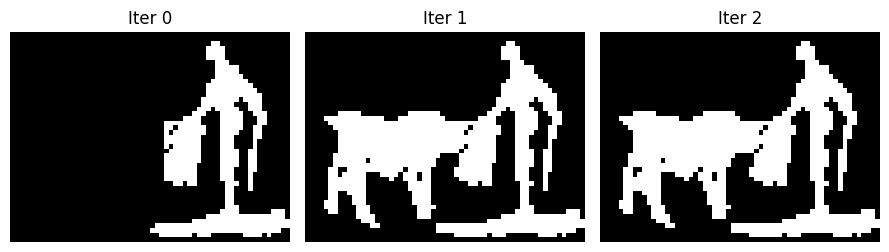

In [25]:
estados = iter_hasta_convergencia(W2, torero_inv_e)
plot_evolucion_compacta(estados, forma5_e,torero_inv,"memorizado")

En este caso se comprueba que la ivnersa del torero es un mínimo (atractor) porque el torero invertido y editado converge al torero invertido. 

Convergencia alcanzada en 1 iteraciones
El último estado es igual al  original


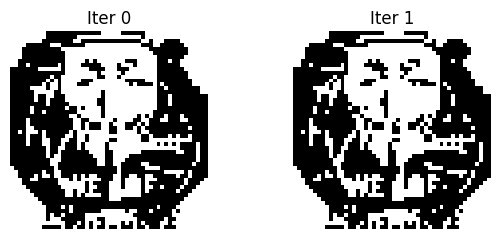

In [26]:
estados = iter_hasta_convergencia(W1, estado_comb_lin1) 
plot_evolucion_compacta(estados, forma2,estado_comb_lin1,"original")

Acá se demuestra que una combinación lineal de las 3 imágenes de la red 1 es un mínimo local. La red no cambia de ese estado. 

Convergencia alcanzada en 2 iteraciones
El último estado es igual al  original


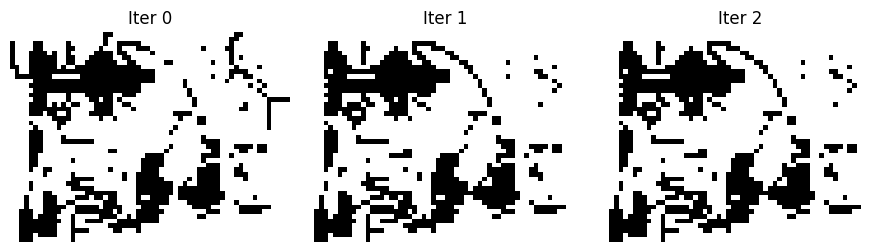

In [27]:
estados = iter_hasta_convergencia(W2, estado_comb_lin2_e) 
plot_evolucion_compacta(estados, forma5_e,estado_comb_lin2,"original")

Acá se demostró que el estado combinación lineal de las imágenes de la red neuronal 2 (paloma, quijote, torero) es un atractor, atrayendo al estado combinación lineal hecho con la paloma editada. 

En resumen, se pudo observar la existencia de estados espurios varios en la red. El único tipo de estado espurio que no se demostró es el que es verdaderamente aleatorio, que no sería ni el inverso o combinación lineal de los memorizados. 


### Inciso 4

En este inciso voy a entrenar una red con todas las imágenes. Lo primero sería llevar todas las imágenes al mismo tamaño, porque no tiene sentido. El tamaño 60x60 parece un punto de inicio razonable. Luego del redimensionamiento se va a crear una nueva W (W3) y probar la memoria de la red con el método del primer inciso.

In [28]:
# por simpleza edito un poco la función que crea las fotos para que las redimensione a una forma particular

forma = (60,60) # tupla de forma

def read_image_redim(path,forma):
    img = Image.open(path).convert('1')  # escala blanco y negro
    img = img.resize(forma,resample=Image.NEAREST)  # resize con nearest
    vector_img = np.array(img, dtype=np.int8)  # Directamente como float32
    vector_img = vector_img.ravel()
    vector_img = (vector_img * 2 ) - 1  # (0,1) -> (-1,1)
    vector_img = np.asarray(vector_img).reshape(-1, 1)  # Convertir a columna
    return vector_img

In [29]:
# las piso porque no se reusan después
paloma_res = read_image_redim(path1,forma)
panda_res = read_image_redim(path2,forma)
perro_res = read_image_redim(path3,forma)
quijote_res = read_image_redim(path4,forma)
torero_res = read_image_redim(path5,forma)
v_res = read_image_redim(path6,forma)

In [30]:
dataset3 =  np.hstack((paloma_res,panda_res,perro_res,quijote_res,torero_res,v_res)) # dataset 3

W3 = calcular_W(dataset3) # matriz W3

Ahora paso a probar si aprendió los estados. 

paloma: no son iguales



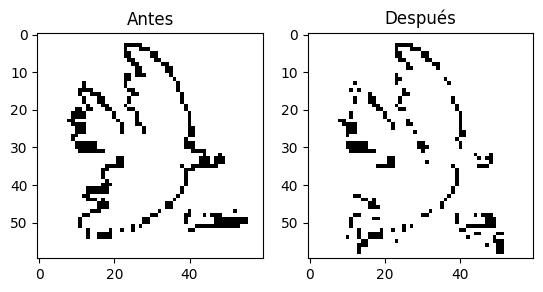

In [31]:
step = chequear_memoria("paloma:",W3,paloma_res)
mostrar_par_antes_desp_img(paloma_res,step,forma)

panda: no son iguales



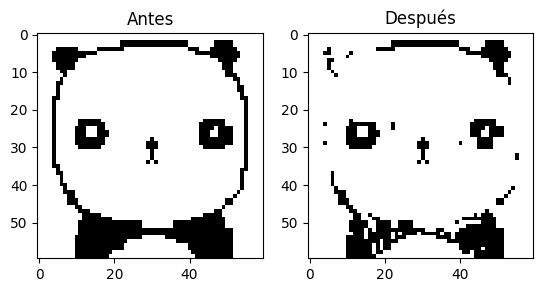

In [32]:
step = chequear_memoria("panda:",W3,panda_res)
mostrar_par_antes_desp_img(panda_res,step,forma)

perro: son iguales



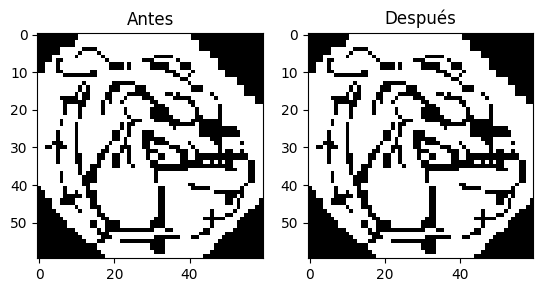

In [33]:
step = chequear_memoria("perro:",W3,perro_res)
mostrar_par_antes_desp_img(perro_res,step,forma)

quijote: son iguales



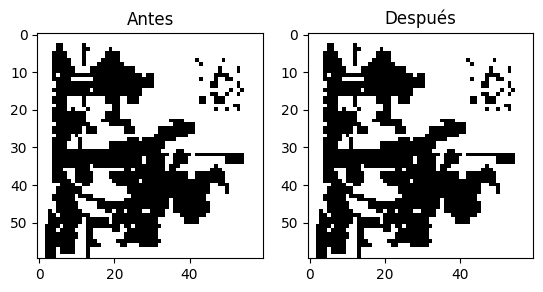

In [34]:
step = chequear_memoria("quijote:",W3,quijote_res)
mostrar_par_antes_desp_img(quijote_res,step,forma)

torero: son iguales



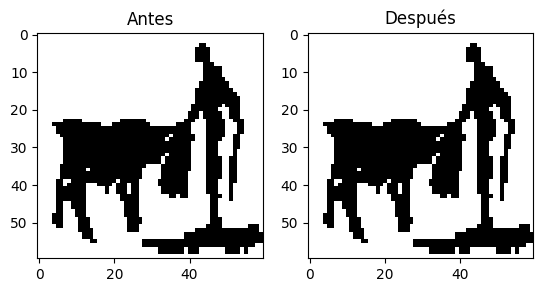

In [35]:
step = chequear_memoria("torero:",W3,torero_res)
mostrar_par_antes_desp_img(torero_res,step,forma)

v: son iguales



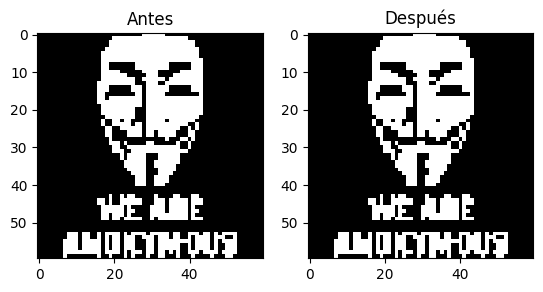

In [36]:
step = chequear_memoria("v:",W3,v_res)
mostrar_par_antes_desp_img(v_res,step,forma)

Se nota que la red aprendió 4 de los 6 estados enseñados (todos menos el panda y la paloma). Probando, la correlación entre las imágenes no me indicó nada, incluso la paloma y panda están menos correlacionadas que con otras imágenes (primer función de abajo). Esto me lleva a pensar que la causa de la falla en la memorización viene de la cercanía de las imágenes (distancia de Hamming -  segunda función). 

In [37]:
# Función alternativa para calcular la correlación de Pearson entre dos vectores
def correlacion_pearson_v2(vec1, vec2):
    """Calcula la correlación de Pearson entre dos vectores 1D."""
    vec1_flat = vec1.flatten()
    vec2_flat = vec2.flatten()
    mean1 = np.mean(vec1_flat)
    mean2 = np.mean(vec2_flat)
    num = np.sum((vec1_flat - mean1) * (vec2_flat - mean2))
    den = np.sqrt(np.sum((vec1_flat - mean1)**2) * np.sum((vec2_flat - mean2)**2))
    return num / den if den != 0 else 0

vectores = [paloma_res, panda_res, perro_res, quijote_res, torero_res, v_res]
nombres = ['paloma', 'panda', 'perro', 'quijote', 'torero', 'v']

# Ejemplo: correlaciones entre los 6 vectores redimensionados (alternativa)
for i in range(len(vectores)):
    for j in range(i+1, len(vectores)):
        corr = correlacion_pearson_v2(vectores[i], vectores[j])
        print(f'Correlación (v2) entre {nombres[i]} y {nombres[j]}: {corr:.3f}')

Correlación (v2) entre paloma y panda: 0.015
Correlación (v2) entre paloma y perro: -0.039
Correlación (v2) entre paloma y quijote: 0.009
Correlación (v2) entre paloma y torero: 0.026
Correlación (v2) entre paloma y v: -0.008
Correlación (v2) entre panda y perro: 0.036
Correlación (v2) entre panda y quijote: -0.089
Correlación (v2) entre panda y torero: 0.016
Correlación (v2) entre panda y v: 0.015
Correlación (v2) entre perro y quijote: -0.055
Correlación (v2) entre perro y torero: -0.061
Correlación (v2) entre perro y v: 0.118
Correlación (v2) entre quijote y torero: 0.162
Correlación (v2) entre quijote y v: -0.036
Correlación (v2) entre torero y v: 0.024


In [38]:
# Función para calcular la distancia de Hamming entre dos vectores
def distancia_hamming(vec1, vec2):
    """Calcula la distancia de Hamming entre dos vectores 1D (-1,1)."""
    # Convertir a binario (0,1) para Hamming
    bin1 = ((vec1.flatten() + 1) // 2).astype(int)
    bin2 = ((vec2.flatten() + 1) // 2).astype(int)
    return np.sum(bin1 != bin2)

# distancias de Hamming entre los 6 vectores redimensionados

for i in range(len(vectores)):
    for j in range(i+1, len(vectores)):
        dist = distancia_hamming(vectores[i], vectores[j])
        print(f'Distancia de Hamming entre {nombres[i]} y {nombres[j]}: {dist}')

Distancia de Hamming entre paloma y panda: 871
Distancia de Hamming entre paloma y perro: 1372
Distancia de Hamming entre paloma y quijote: 1395
Distancia de Hamming entre paloma y torero: 1235
Distancia de Hamming entre paloma y v: 2448
Distancia de Hamming entre panda y perro: 1405
Distancia de Hamming entre panda y quijote: 1626
Distancia de Hamming entre panda y torero: 1376
Distancia de Hamming entre panda y v: 2259
Distancia de Hamming entre perro y quijote: 1741
Distancia de Hamming entre perro y torero: 1693
Distancia de Hamming entre perro y v: 1860
Distancia de Hamming entre quijote y torero: 1364
Distancia de Hamming entre quijote y v: 2063
Distancia de Hamming entre torero y v: 2045


Viendo los resutados, la imágen de la paloma y el panda son las más cercanas segun la distancia de Hamming, lo que podría explicar la confusión del modelo al querer enseñarle las dos imágenes. 

En resumen, la red de 60x60 no fue capaz de aprender todas las imágenes, y se cree que es por la distancia de Hamming entre imágenes. Voy a probar con una red más grande para ver si un aumento en cantidad de neuronas ayuda a la memoria. Pruebo con una red de 100x100 y no más porque no tengo más memoria para reservar (1000x1000 exije 931 Gb). 

In [39]:
# las piso porque no se reusan después
forma = (100,100) #más dimensión, más neuronas
paloma_res = read_image_redim(path1,forma)
panda_res = read_image_redim(path2,forma)
perro_res = read_image_redim(path3,forma)
quijote_res = read_image_redim(path4,forma)
torero_res = read_image_redim(path5,forma)
v_res = read_image_redim(path6,forma)

In [40]:
dataset3 =  np.hstack((paloma_res,panda_res,perro_res,quijote_res,torero_res,v_res)) # dataset 3

W3 = calcular_W(dataset3) # matriz W3

Ahora paso a probar si aprendió los estados. 

paloma: no son iguales



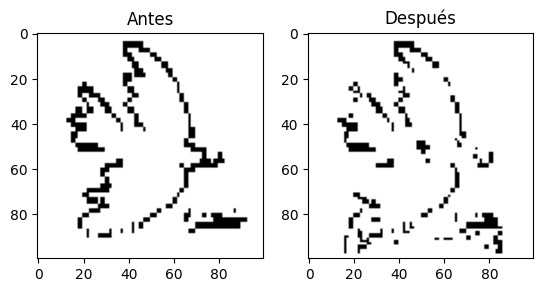

In [41]:
step = chequear_memoria("paloma:",W3,paloma_res)
mostrar_par_antes_desp_img(paloma_res,step,forma)

panda: no son iguales



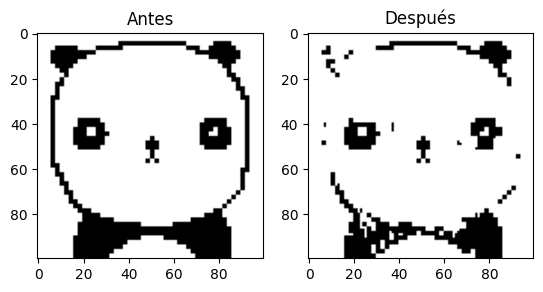

In [42]:
step = chequear_memoria("panda:",W3,panda_res)
mostrar_par_antes_desp_img(panda_res,step,forma)

perro: son iguales



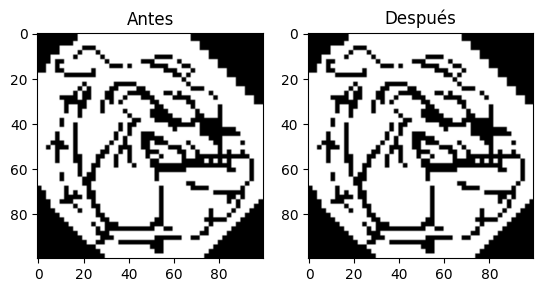

In [43]:
step = chequear_memoria("perro:",W3,perro_res)
mostrar_par_antes_desp_img(perro_res,step,forma)

quijote:

 son iguales



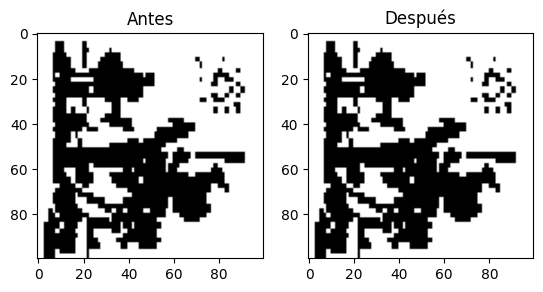

In [44]:
step = chequear_memoria("quijote:",W3,quijote_res)
mostrar_par_antes_desp_img(quijote_res,step,forma)

torero: son iguales



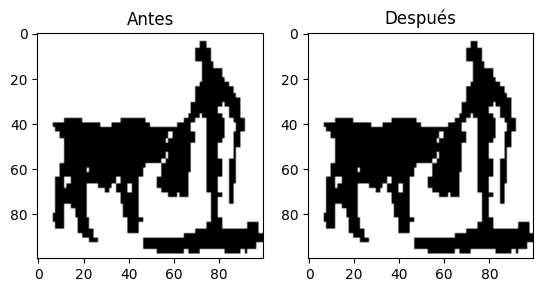

In [45]:
step = chequear_memoria("torero:",W3,torero_res)
mostrar_par_antes_desp_img(torero_res,step,forma)

v: son iguales



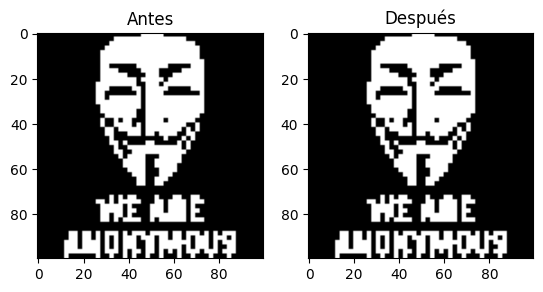

In [46]:
step = chequear_memoria("v:",W3,v_res)
mostrar_par_antes_desp_img(v_res,step,forma)

La red de 100x100 tampoco memorizó todas las imágenes, lo que intuyo apunta a que la limitación está en las imágenes y no en el tamaño de la red, aunque afirmarlo requeriría de más neuronas, algo que no estaría pudiendo hacer por falta de memoria. 